### Preamble

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tqdm

In [28]:
plt.rcParams["figure.figsize"] = (8,6)

### 1) Create a funky and noisy dataset

$y = 0.02x +  \frac{3}{10} sin(x) + 
\frac{1}{10} \Big( log(x) \Big)^2 + \epsilon$,
 
where $\epsilon$ is a random number

In [29]:
N_data = 5000

data_x = np.linspace(1.0, 50.0, N_data)[:, np.newaxis]
data_y = 0.02*data_x + 0.3*np.sin(data_x) + 1e-1  * np.log( data_x ) **2 + 0.2*np.random.randn(N_data,1)
#data_y = data_x + 0.1*np.random.randn(N_data,1)

In [30]:
data_x.shape, data_y.shape

((5000, 1), (5000, 1))

Text(0, 0.5, 'temperature')

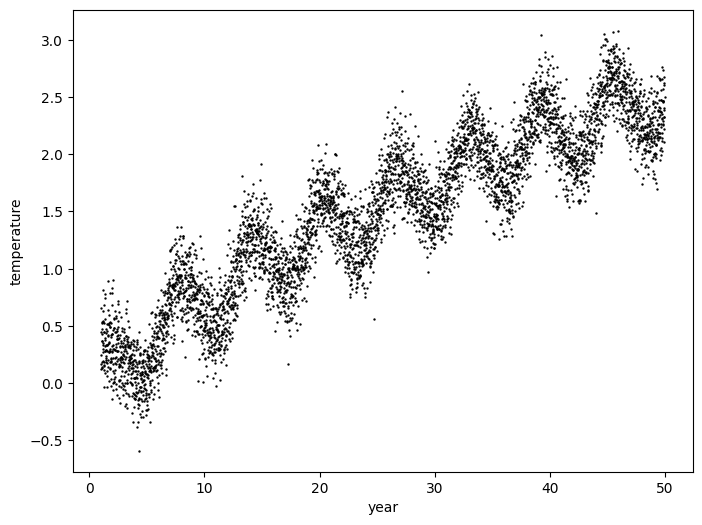

In [31]:
plt.scatter( data_x.flatten(), data_y.flatten(), s=0.5, color='black')
plt.xlabel('year')
plt.ylabel('temperature')

### 2) Make a train-test split of the available dataset

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

In [33]:
X_train.shape, y_train.shape

((4000, 1), (4000, 1))

### 3) A simple gradient descent model

In [34]:
class LinearRegression:
    def __init__(self, X, y, lr=0.001, tolerance=1e-7):

        self.lr = lr
        self.tolerance = tolerance
        self.n_samples = len(y)
        self.n_features = X.shape[1]
        self.X = X
        self.y = y
        self.W = np.ones( (self.n_features ,1) )
        self.b = np.zeros( (1,1) )
        self.losses = []

    def predict(self, X) : 

        y_pred = ( X ).dot( self.W)  + self.b
        return y_pred

    def calc_loss(self, y_targ, y_pred):

        ### L2 (MSE) loss
        return 0.5 * np.mean( (y_pred - y_targ)**2 )

    def calc_gradients(self,y_pred):

        grad_W = np.dot((y_pred-self.y).T,X_train)/self.n_samples
        grad_b = np.mean(y_pred- self.y)    
        return grad_W, grad_b    

    def update_params(self, grad_W, grad_b):

        self.W = self.W - self.lr * grad_W.T
        self.b = self.b - self.lr * grad_b

    def train(self, n_iter=1500): 

        for i in tqdm.tqdm(range(n_iter)):

            y_pred = self.predict(self.X)

            loss = self.calc_loss(self.y, y_pred)
            self.losses.append(loss)

            grad_W, grad_b = self.calc_gradients(y_pred)

            # check if the gradient is smaller than desired precision
            if np.sqrt(np.sum(grad_W)**2 + abs(grad_b)) < self.tolerance:
               break

            self.update_params(grad_W,grad_b)
    


In [35]:
model = LinearRegression(X_train, y_train, lr=1e-5)

### 4) Train the model on the X-y pair data

In [36]:
model.train(n_iter=2000)

100%|██████████| 2000/2000 [00:00<00:00, 31316.55it/s]


Text(0, 0.5, 'loss')

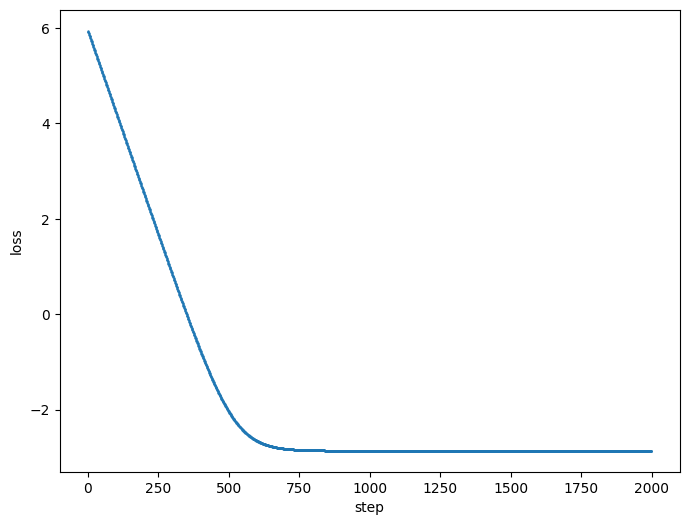

In [37]:
plt.scatter( range(len(model.losses)), np.log(model.losses),s=0.5)
plt.xlabel('step')
plt.ylabel('loss')

### 5) Evaluate model performance on _independent_ test dataset

In [38]:
y_pred = model.predict( X_test)

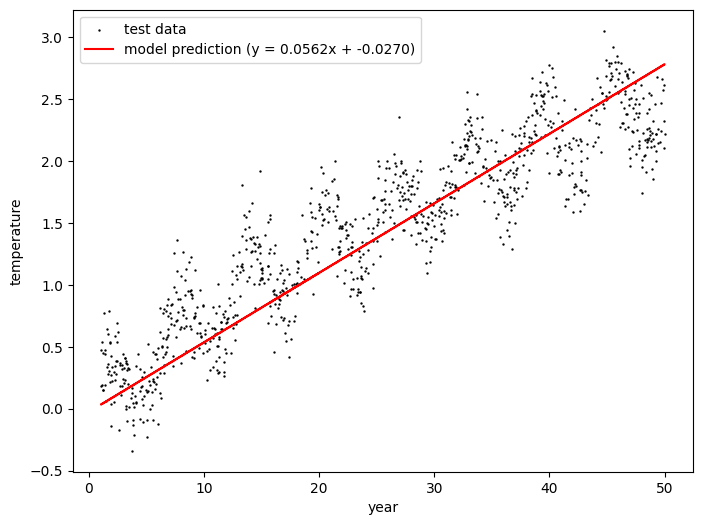

In [39]:
plt.scatter( X_test.flatten(), y_test.flatten(), s=0.5, color='black',label='test data')
plt.xlabel('year')
plt.ylabel('temperature')
plt.plot( X_test, y_pred, color='r', linewidth=1.5, label='model prediction (y = {:.4f}x + {:.4f})'.format(float(model.W),float(model.b)))
plt.legend()